# Natural Language Processing for Sentiment and Emotion Analysis: A Comprehensive Guide to Text Classification using Machine Learning and Deep Learning Algorithms, with Web Model Deployment

![70%20nlp.png](attachment:70%20nlp.png)

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('sentiments.csv')

In [ ]:
df

Unnamed: 0                   Datetime      Tweet Id  \
0              0  2022-09-30 23:29:15+00:00  1.575990e+18   
1              1  2022-09-30 21:46:35+00:00  1.575970e+18   
2              2  2022-09-30 21:18:02+00:00  1.575960e+18   
3              3  2022-09-30 20:05:24+00:00  1.575940e+18   
4              4  2022-09-30 20:03:17+00:00  1.575940e+18   
...          ...                        ...           ...   
3760        3760  2022-08-17 14:00:00+00:00  1.559900e+18   
3761        3761  2022-08-17 13:57:30+00:00  1.559900e+18   
3762        3762  2022-08-17 13:33:17+00:00  1.559900e+18   
3763        3763  2022-08-17 13:32:58+00:00  1.559900e+18   
3764        3764  2022-08-17 13:32:37+00:00  1.559900e+18   

                                                   Text         Username  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   ManjuSreedaran   
1     @MK_habit_addict @official_stier @MortalKombat...       MiKeMcDnet   
2     As @CRN celebrates its 40th anniversary, Bob F...         jfollett   
3     @dell your customer service is horrible especi...        daveccarr   
4     @zacokalo @Dell @DellCares @Dell give the man ...       heycamella   
...                                                 ...              ...   
3760  Today is the day! Get your questions answered ...          wwt_inc   
3761  Re: the above\n\n@Dell @DellServices I have th...  keepingevenkeel   
3762  Want to share about my dell horror story.just ...      aviinfinity   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...        omocopalm   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...     AnkitaAnkkie   

     sentiment  sentiment_score       emotion  emotion_score  
0      neutral         0.853283  anticipation       0.587121  
1      neutral         0.519470           joy       0.886913  
2     positive         0.763791           joy       0.960347  
3     negative         0.954023         anger       0.983203  
4      neutral         0.529170         anger       0.776124  
...        ...              ...           ...            ...  
3760  positive         0.657329  anticipation       0.837537  
3761   neutral         0.689704  anticipation       0.506186  
3762  negative         0.649829       disgust       0.775682  
3763  negative         0.523149       disgust       0.851560  
3764  positive         0.000000           NaN            NaN  

[3765 rows x 9 columns]

In [ ]:
df = df.drop(['Unnamed: 0', 'Tweet Id'], axis = 1)

In [ ]:
df

Datetime  \
0     2022-09-30 23:29:15+00:00   
1     2022-09-30 21:46:35+00:00   
2     2022-09-30 21:18:02+00:00   
3     2022-09-30 20:05:24+00:00   
4     2022-09-30 20:03:17+00:00   
...                         ...   
3760  2022-08-17 14:00:00+00:00   
3761  2022-08-17 13:57:30+00:00   
3762  2022-08-17 13:33:17+00:00   
3763  2022-08-17 13:32:58+00:00   
3764  2022-08-17 13:32:37+00:00   

                                                   Text         Username  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   ManjuSreedaran   
1     @MK_habit_addict @official_stier @MortalKombat...       MiKeMcDnet   
2     As @CRN celebrates its 40th anniversary, Bob F...         jfollett   
3     @dell your customer service is horrible especi...        daveccarr   
4     @zacokalo @Dell @DellCares @Dell give the man ...       heycamella   
...                                                 ...              ...   
3760  Today is the day! Get your questions answered ...          wwt_inc   
3761  Re: the above\n\n@Dell @DellServices I have th...  keepingevenkeel   
3762  Want to share about my dell horror story.just ...      aviinfinity   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...        omocopalm   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...     AnkitaAnkkie   

     sentiment  sentiment_score       emotion  emotion_score  
0      neutral         0.853283  anticipation       0.587121  
1      neutral         0.519470           joy       0.886913  
2     positive         0.763791           joy       0.960347  
3     negative         0.954023         anger       0.983203  
4      neutral         0.529170         anger       0.776124  
...        ...              ...           ...            ...  
3760  positive         0.657329  anticipation       0.837537  
3761   neutral         0.689704  anticipation       0.506186  
3762  negative         0.649829       disgust       0.775682  
3763  negative         0.523149       disgust       0.851560  
3764  positive         0.000000           NaN            NaN  

[3765 rows x 7 columns]

In [ ]:
df.shape

(3765, 7)

In [ ]:
df.columns

Index(['Datetime', 'Text', 'Username', 'sentiment', 'sentiment_score',
       'emotion', 'emotion_score'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Datetime           0
Text               0
Username           0
sentiment          0
sentiment_score    0
emotion            1
emotion_score      1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765 entries, 0 to 3764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         3765 non-null   object 
 1   Text             3765 non-null   object 
 2   Username         3765 non-null   object 
 3   sentiment        3765 non-null   object 
 4   sentiment_score  3765 non-null   float64
 5   emotion          3764 non-null   object 
 6   emotion_score    3764 non-null   float64
dtypes: float64(2), object(5)
memory usage: 235.3+ KB


In [ ]:
df.describe()

sentiment_score  emotion_score
count      3765.000000    3764.000000
mean          0.794125       0.813086
std           0.147132       0.207472
min           0.000000       0.136233
25%           0.684035       0.722799
50%           0.835845       0.909271
75%           0.917496       0.969880
max           0.991531       0.992744

In [ ]:
df.nunique()

Datetime           3754
Text               3723
Username           2269
sentiment             3
sentiment_score    3723
emotion               8
emotion_score      3717
dtype: int64

# Data Visualization

In [ ]:
df['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

negative    1630
neutral     1087
positive    1048
Name: sentiment, dtype: int64

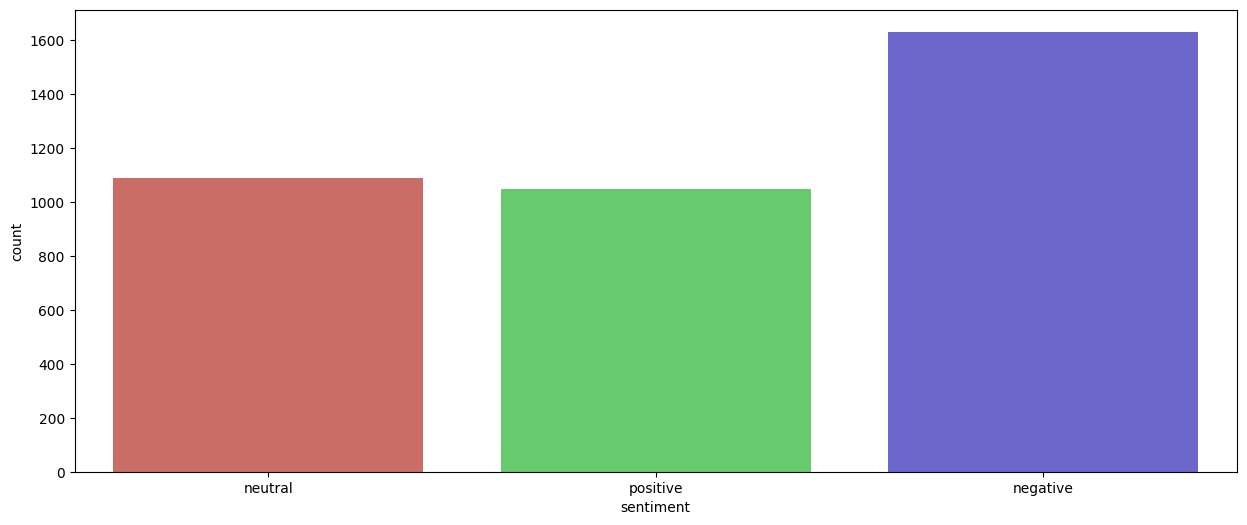

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x= 'sentiment', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

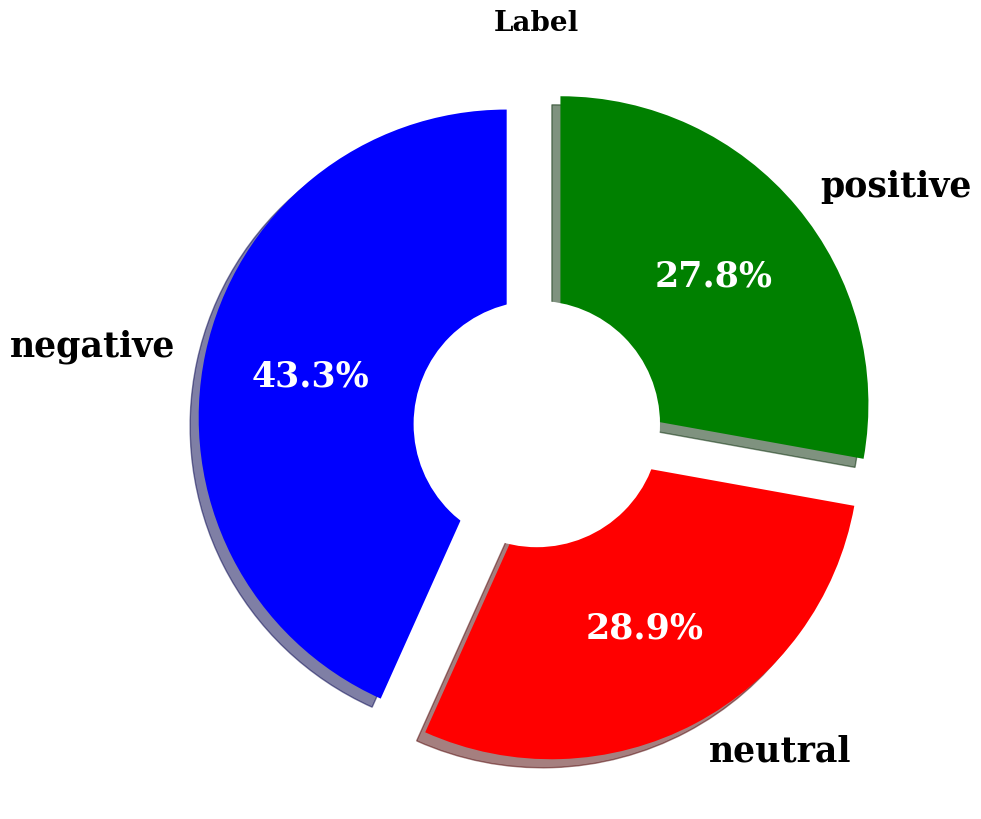

In [ ]:
label_data = df['sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts())])
fig.update_layout(
        title= 'Sentiment',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [ ]:
counts = df['sentiment'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'sentiment')
fig.show()

In [ ]:
df['emotion'].unique()

array(['anticipation', 'joy', 'anger', 'sadness', 'fear', 'optimism',
       'disgust', 'surprise', nan], dtype=object)

In [ ]:
df['emotion'].value_counts()

anger           1140
joy              906
anticipation     744
disgust          526
sadness          214
optimism         153
fear              76
surprise           5
Name: emotion, dtype: int64

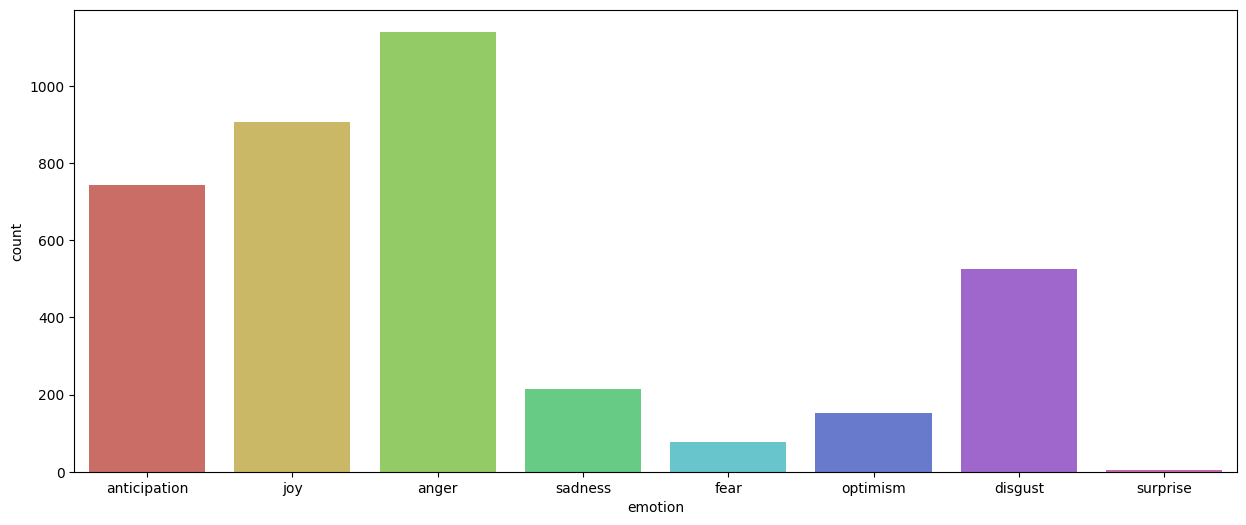

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x ='emotion', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

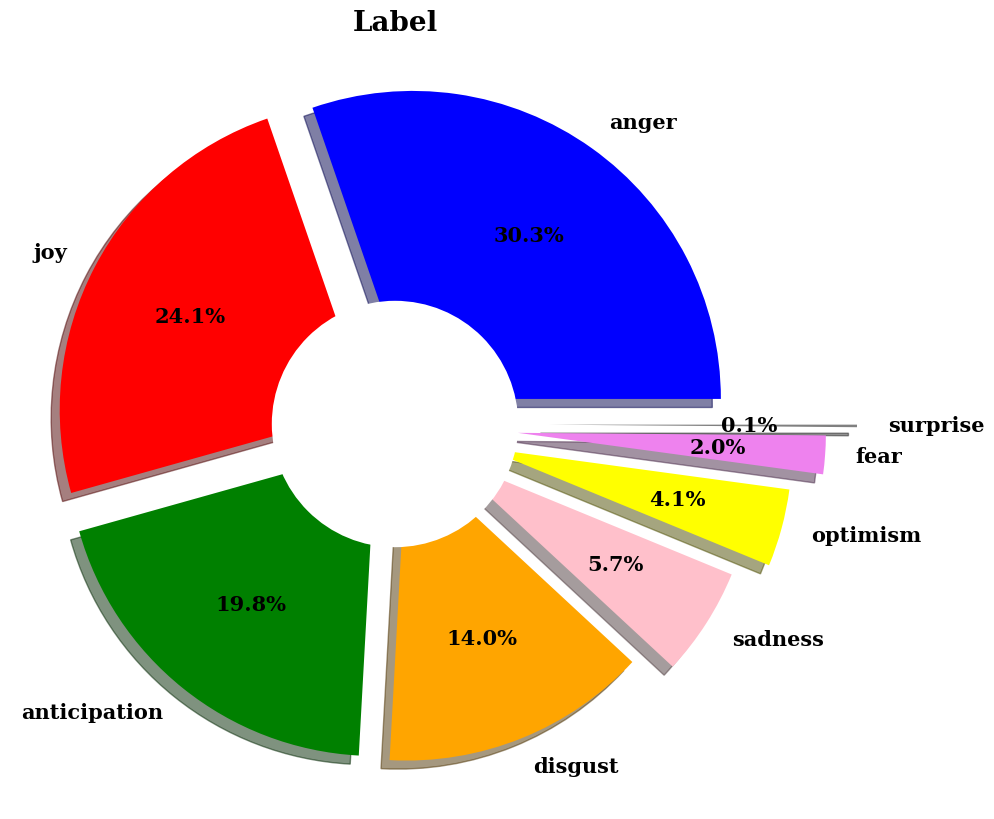

In [ ]:
label_data = df['emotion'].value_counts()

explode = (0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green', 'orange', 'pink', 'yellow', 'violet', 'grey'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['emotion'].value_counts().index, y=df['emotion'].value_counts())])
fig.update_layout(
        title= 'Emotion',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [ ]:
counts = df['emotion'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Emotion')
fig.show()

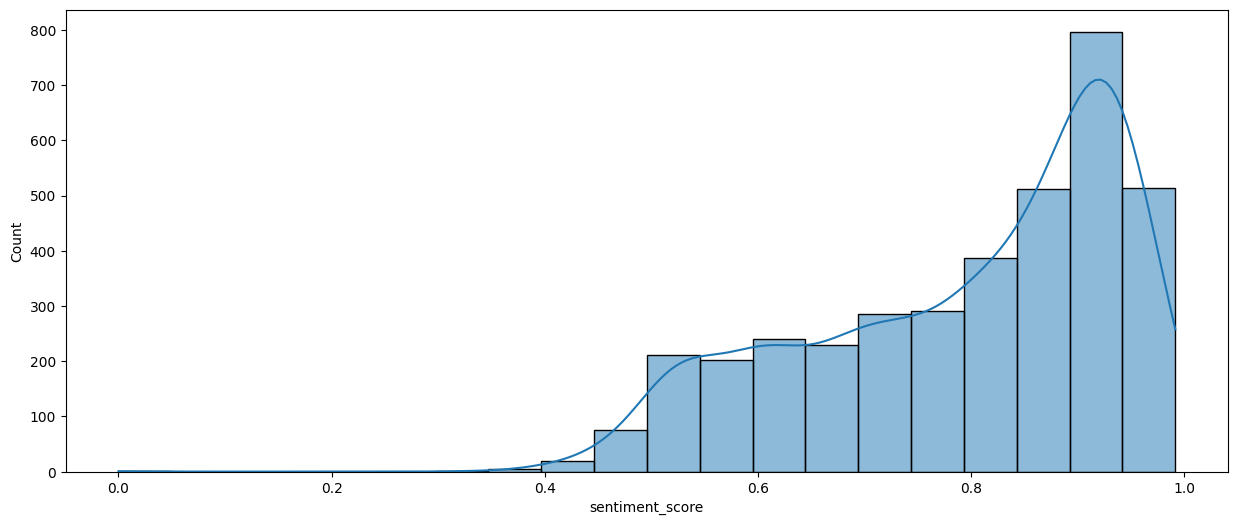

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['sentiment_score'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
import plotly.io as pio

fig = go.Figure(data=[go.Histogram(x=df['sentiment_score'], nbinsx=20, marker_color='lightskyblue')])

fig.update_layout(
    title="Sentiment Score Histogram",
    xaxis_title="Sentiment Score",
    yaxis_title="Frequency",
    xaxis=dict(tickangle=0),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=False,
    width=800,
    height=400
)

pio.show(fig)

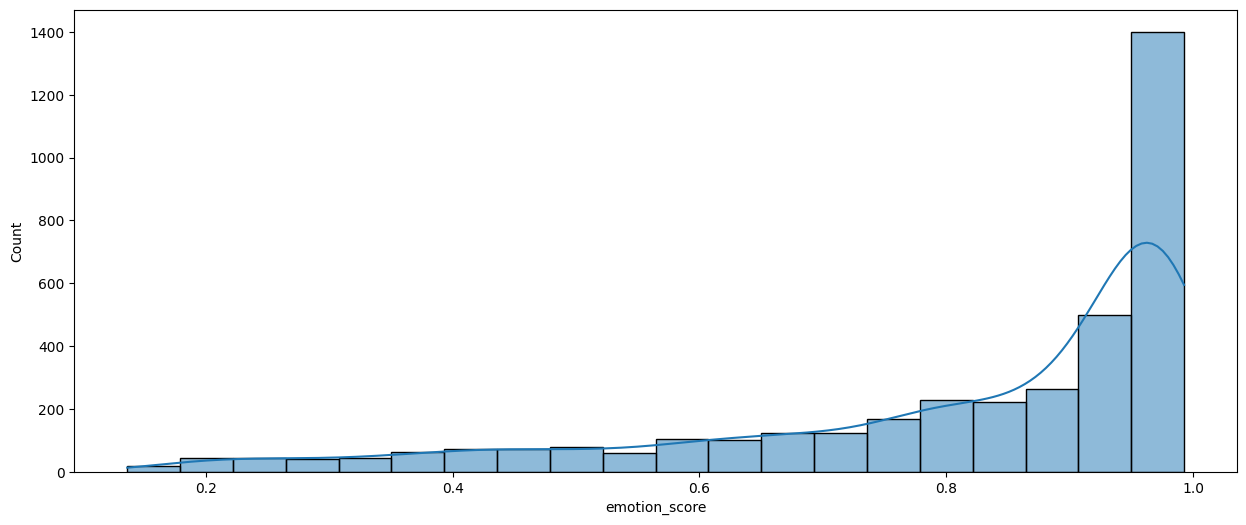

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['emotion_score'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=df['emotion_score'], nbinsx=20, marker_color='lightskyblue')])

fig.update_layout(
    title="Emotion Score Histogram",
    xaxis_title="Emotion Score",
    yaxis_title="Frequency",
    xaxis=dict(tickangle=0),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=False,
    width=800,
    height=400
)

pio.show(fig)

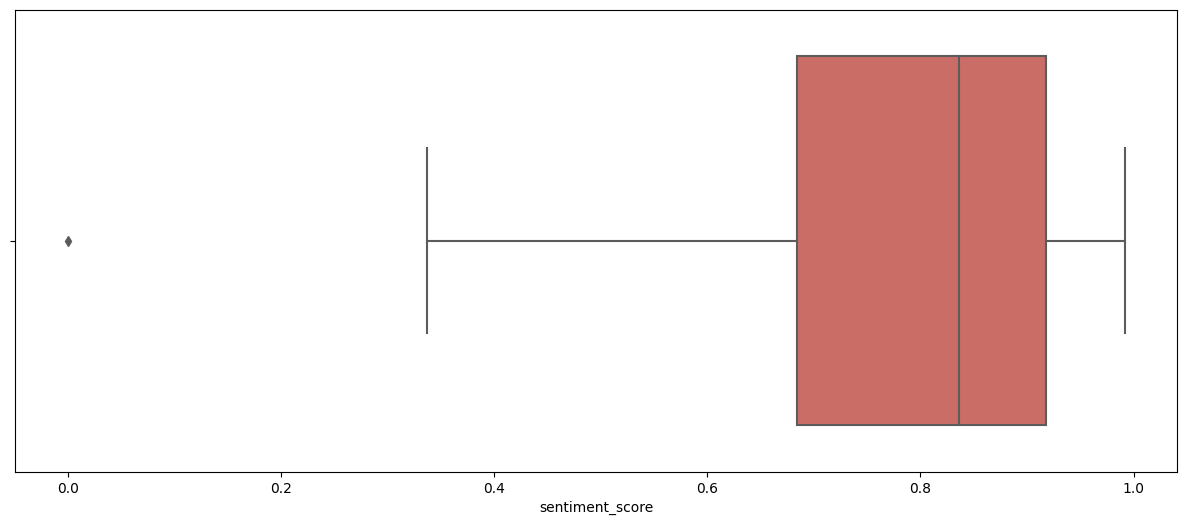

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='sentiment_score', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
import plotly.express as px

fig = px.box(df, y='sentiment_score')
fig.update_layout(title='Box Plot of Sentiment Scores')
fig.show()

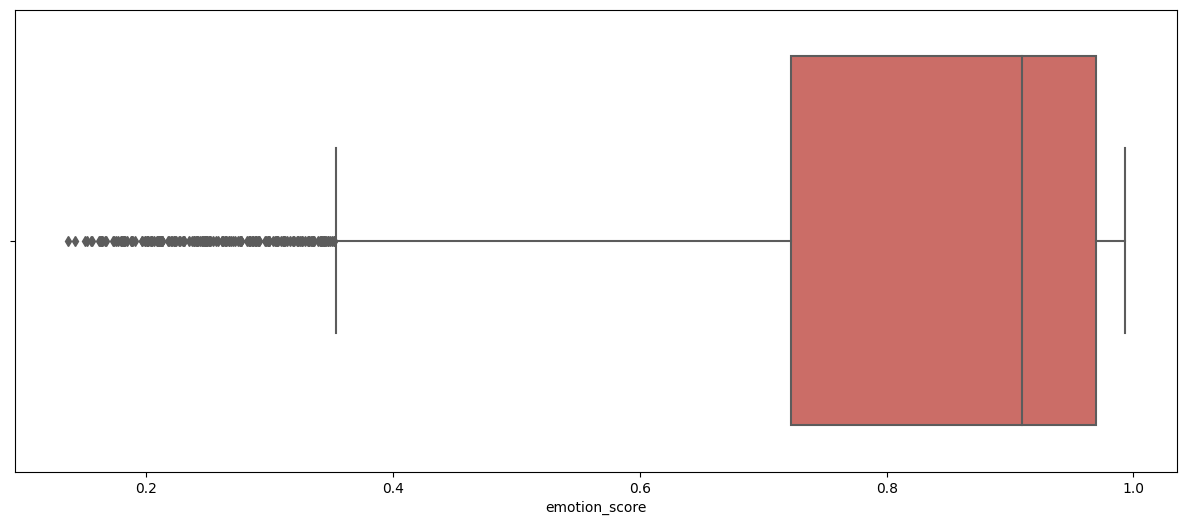

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='emotion_score', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = px.box(df, y='emotion_score')
fig.update_layout(title='Box Plot of Emotion Scores')
fig.show()

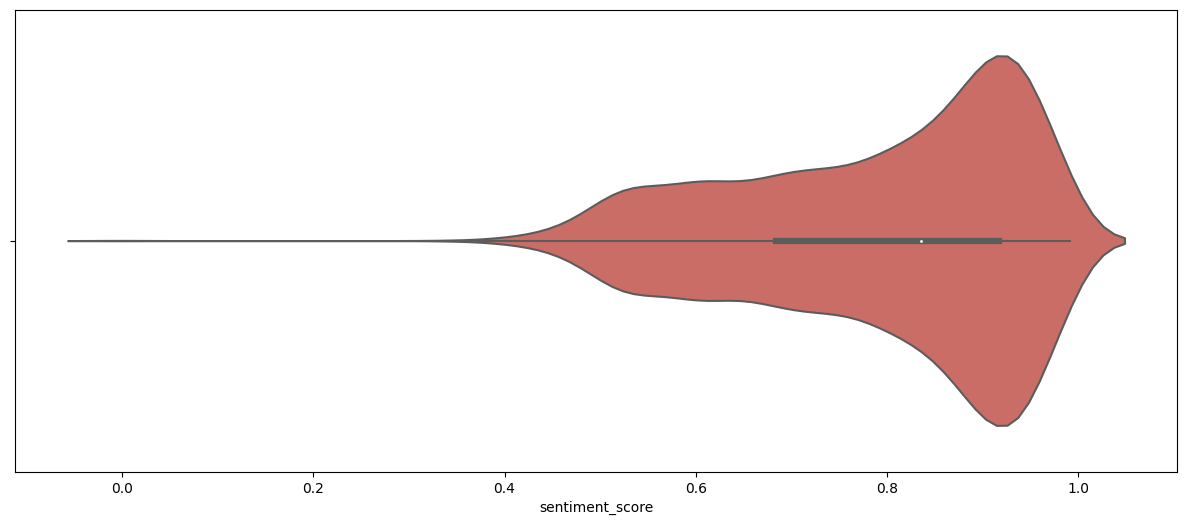

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x='sentiment_score', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = px.violin(df, y='sentiment_score')
fig.update_layout(title='Violin Plot of Sentiment Scores')
fig.show()

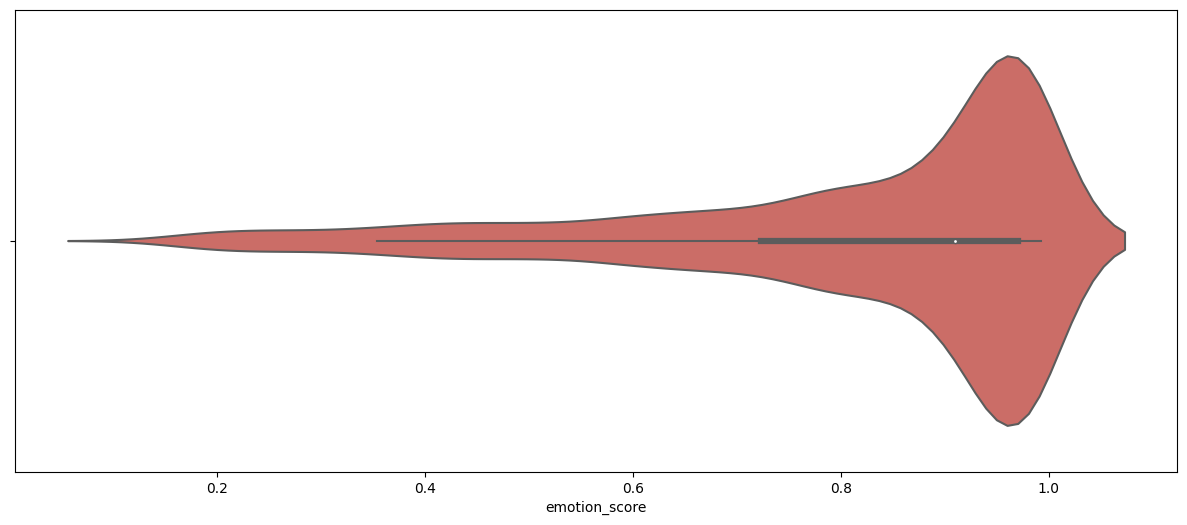

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x='emotion_score', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = px.violin(df, y='emotion_score')
fig.update_layout(title='Violin Plot of Emotion Scores')
fig.show()

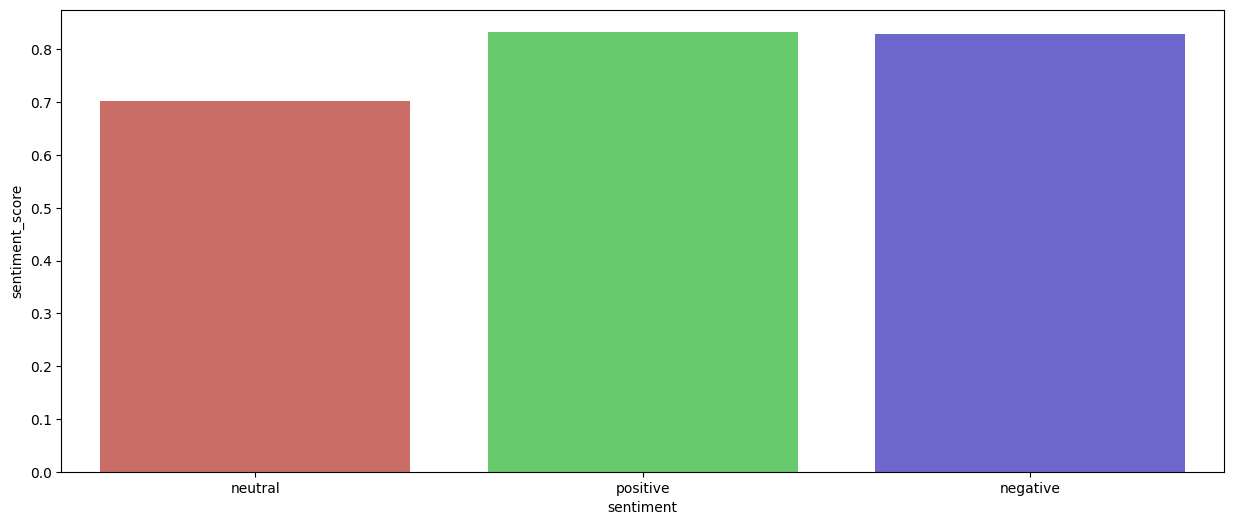

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['sentiment'], y = df['sentiment_score'], data = df, ci = None, palette = 'hls')
plt.show()

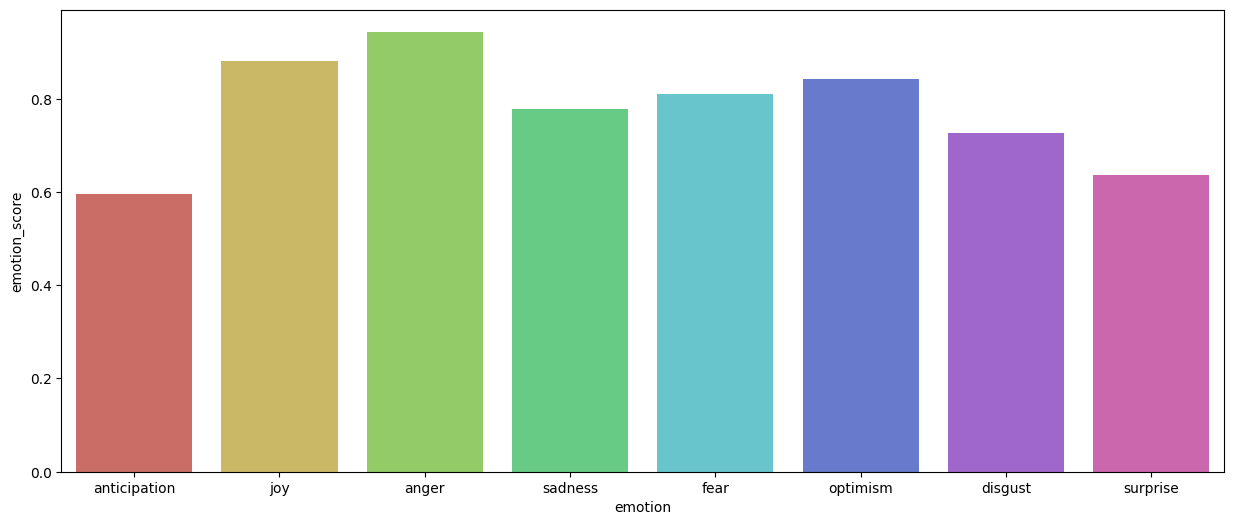

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['emotion'], y = df['emotion_score'], data = df, ci = None, palette = 'hls')
plt.show()

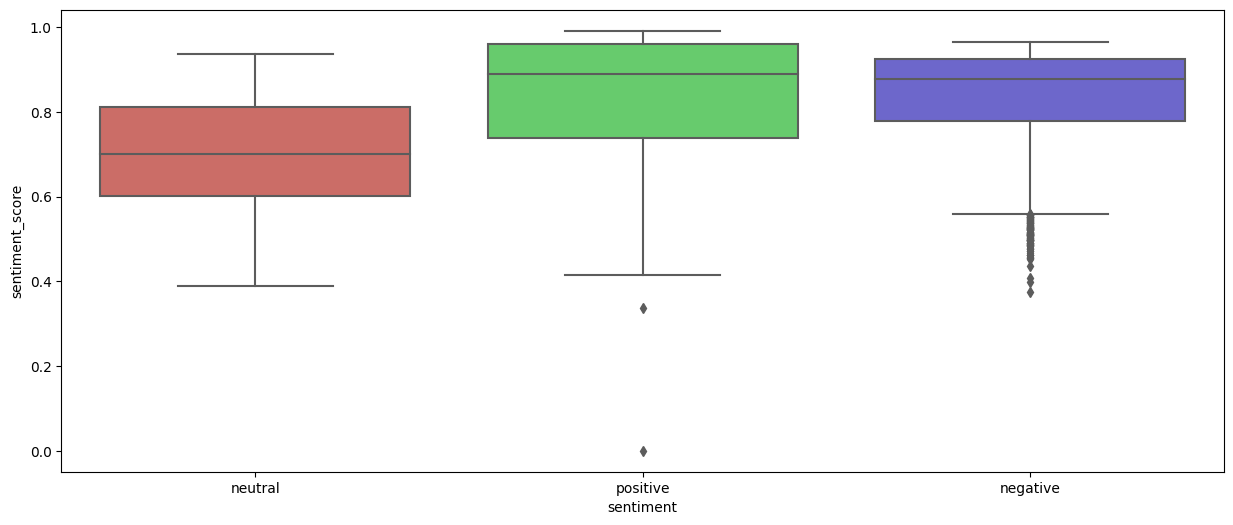

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['sentiment'], y = df['sentiment_score'], data = df, palette = 'hls')
plt.show()

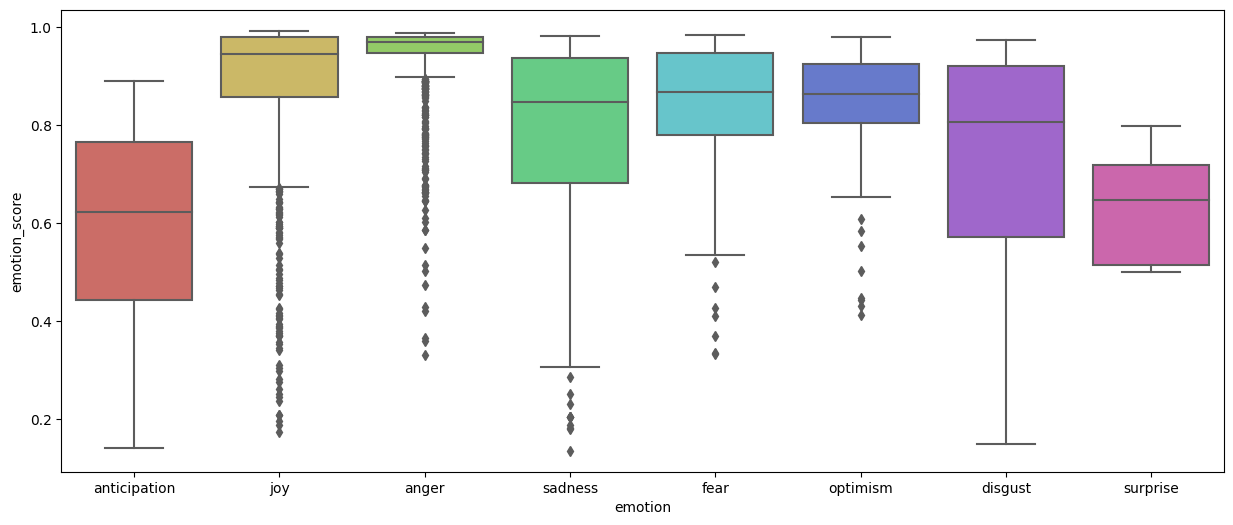

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['emotion'], y = df['emotion_score'], data = df, palette = 'hls')
plt.show()

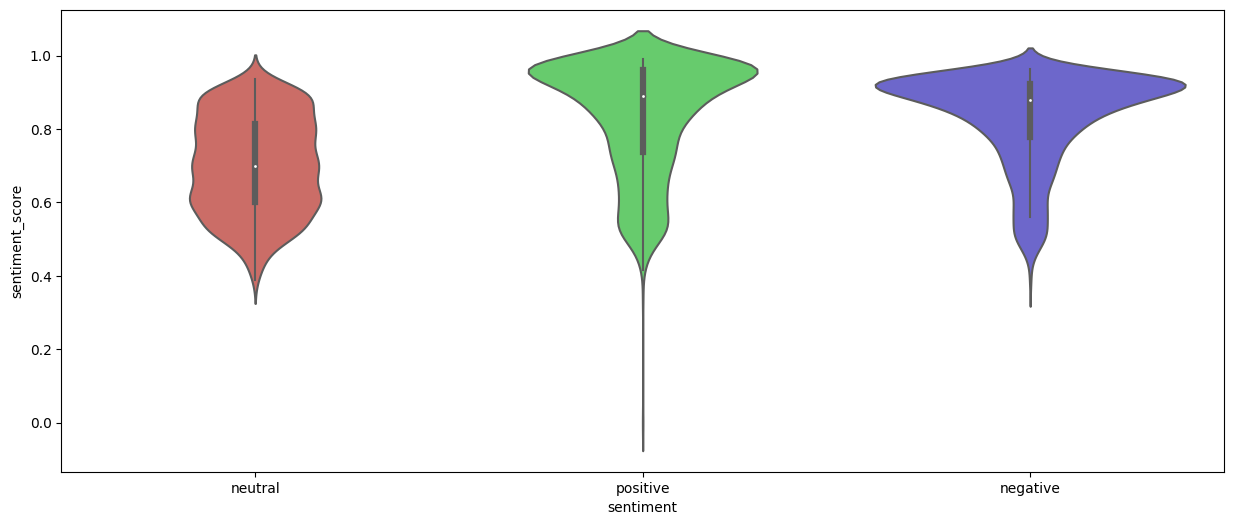

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x = df['sentiment'], y = df['sentiment_score'], data = df, palette = 'hls')
plt.show()

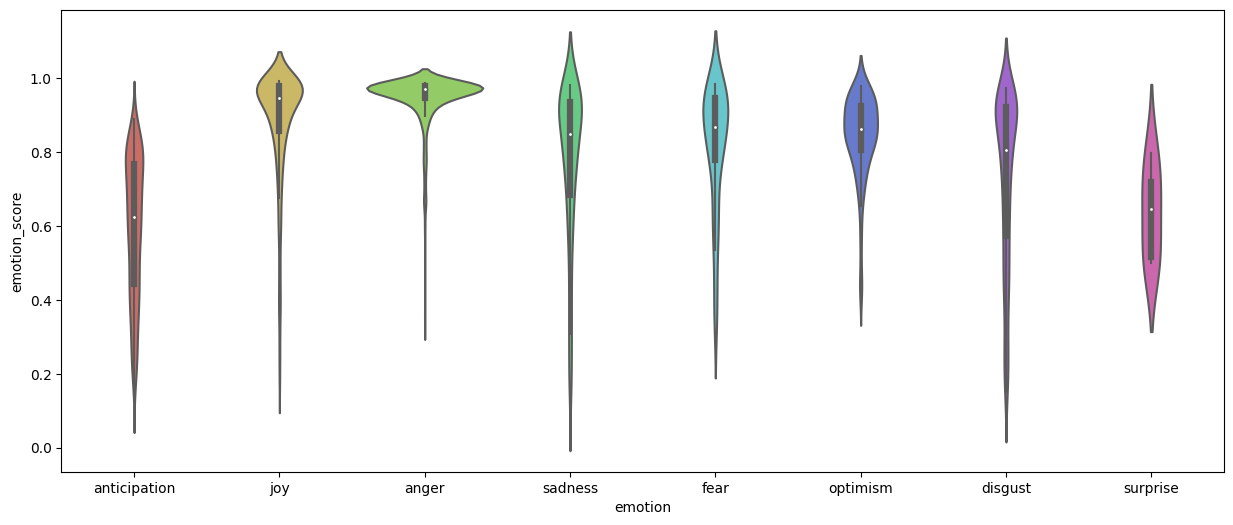

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x = df['emotion'], y = df['emotion_score'], data = df, palette = 'hls')
plt.show()

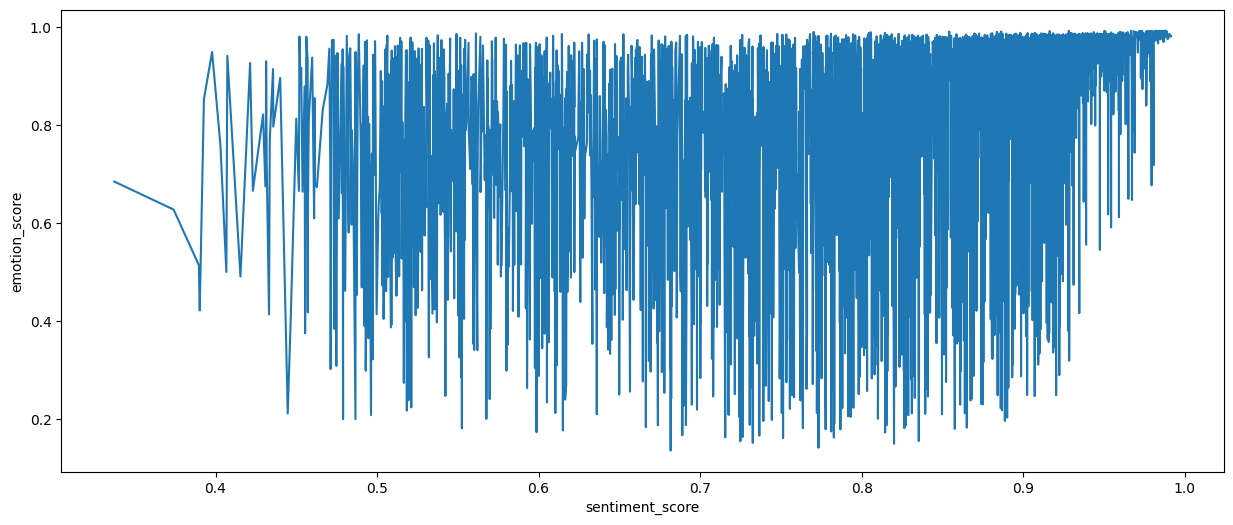

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['sentiment_score'], y = df['emotion_score'], data = df, ci = None, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

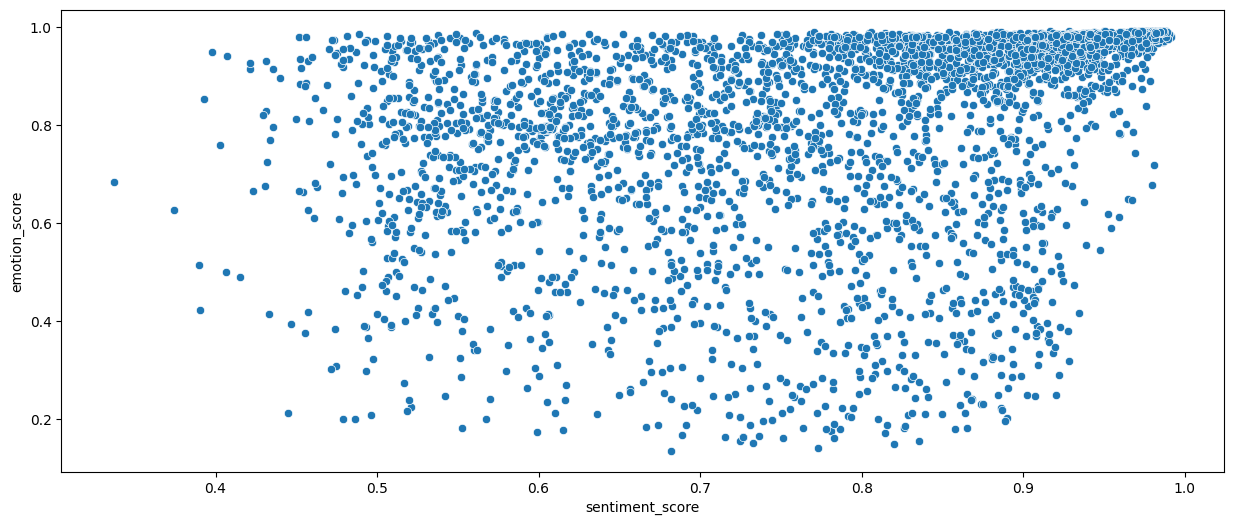

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['sentiment_score'], y = df['emotion_score'], data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

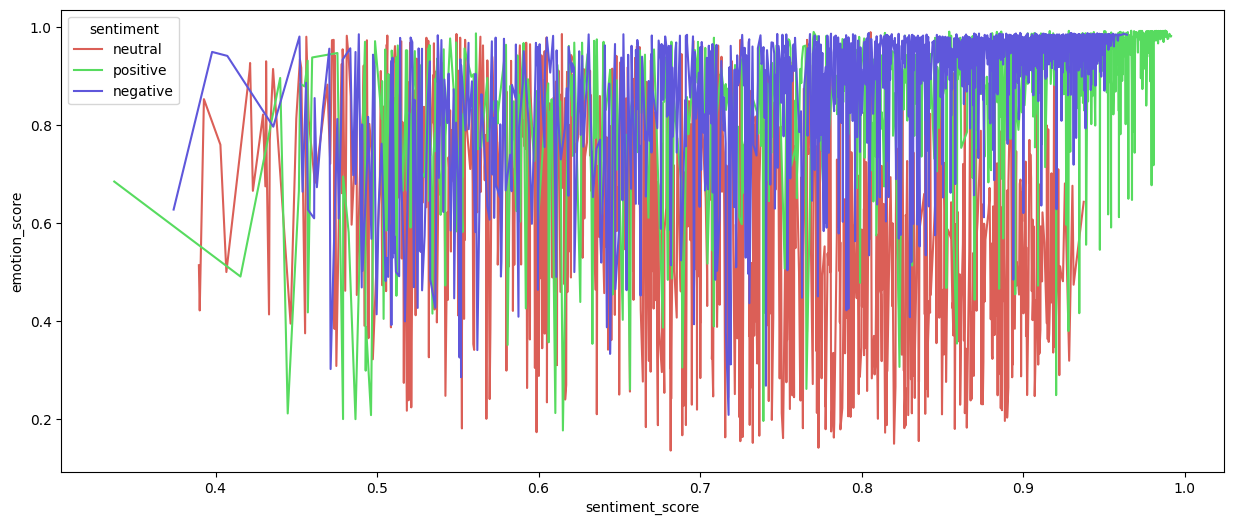

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['sentiment_score'], y = df['emotion_score'], hue = df['sentiment'], data = df, ci = None, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

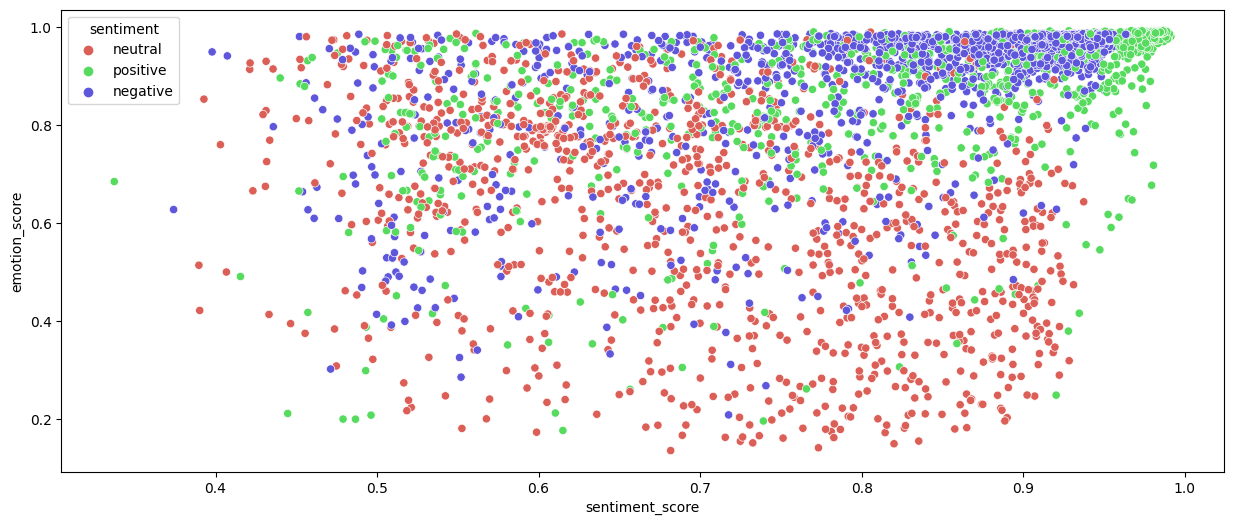

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['sentiment_score'], y = df['emotion_score'], hue = df['sentiment'], data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

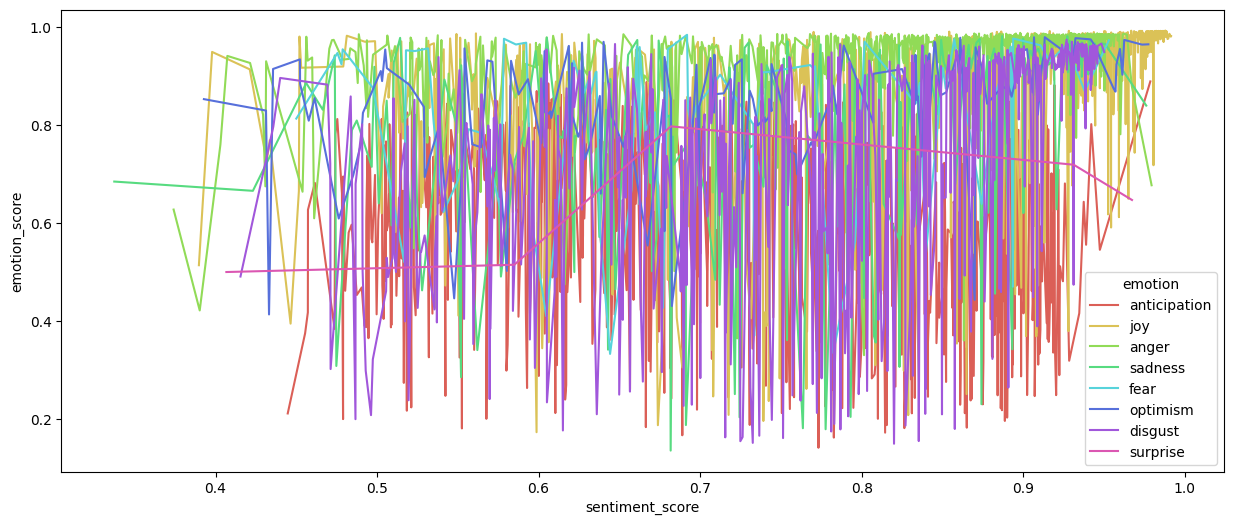

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['sentiment_score'], y = df['emotion_score'], hue = df['emotion'], data = df, ci = None, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

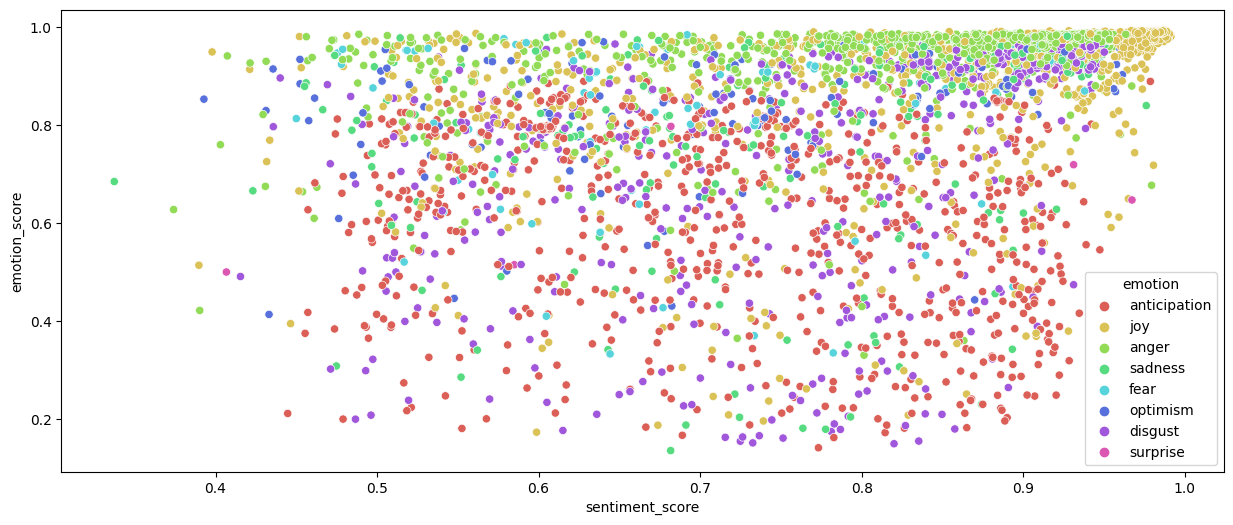

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['sentiment_score'], y = df['emotion_score'], hue = df['emotion'], data = df,  palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df

Datetime  \
0    2022-09-30 23:29:15+00:00   
1    2022-09-30 21:46:35+00:00   
2    2022-09-30 21:18:02+00:00   
3    2022-09-30 20:05:24+00:00   
4    2022-09-30 20:03:17+00:00   
...                        ...   
3760 2022-08-17 14:00:00+00:00   
3761 2022-08-17 13:57:30+00:00   
3762 2022-08-17 13:33:17+00:00   
3763 2022-08-17 13:32:58+00:00   
3764 2022-08-17 13:32:37+00:00   

                                                   Text         Username  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   ManjuSreedaran   
1     @MK_habit_addict @official_stier @MortalKombat...       MiKeMcDnet   
2     As @CRN celebrates its 40th anniversary, Bob F...         jfollett   
3     @dell your customer service is horrible especi...        daveccarr   
4     @zacokalo @Dell @DellCares @Dell give the man ...       heycamella   
...                                                 ...              ...   
3760  Today is the day! Get your questions answered ...          wwt_inc   
3761  Re: the above\n\n@Dell @DellServices I have th...  keepingevenkeel   
3762  Want to share about my dell horror story.just ...      aviinfinity   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...        omocopalm   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...     AnkitaAnkkie   

     sentiment  sentiment_score       emotion  emotion_score  
0      neutral         0.853283  anticipation       0.587121  
1      neutral         0.519470           joy       0.886913  
2     positive         0.763791           joy       0.960347  
3     negative         0.954023         anger       0.983203  
4      neutral         0.529170         anger       0.776124  
...        ...              ...           ...            ...  
3760  positive         0.657329  anticipation       0.837537  
3761   neutral         0.689704  anticipation       0.506186  
3762  negative         0.649829       disgust       0.775682  
3763  negative         0.523149       disgust       0.851560  
3764  positive         0.000000           NaN            NaN  

[3765 rows x 7 columns]

In [ ]:
df.columns

Index(['Datetime', 'Text', 'Username', 'sentiment', 'sentiment_score',
       'emotion', 'emotion_score'],
      dtype='object')

# Feature Engineering

In [ ]:
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

In [ ]:
df

Datetime  \
0    2022-09-30 23:29:15+00:00   
1    2022-09-30 21:46:35+00:00   
2    2022-09-30 21:18:02+00:00   
3    2022-09-30 20:05:24+00:00   
4    2022-09-30 20:03:17+00:00   
...                        ...   
3760 2022-08-17 14:00:00+00:00   
3761 2022-08-17 13:57:30+00:00   
3762 2022-08-17 13:33:17+00:00   
3763 2022-08-17 13:32:58+00:00   
3764 2022-08-17 13:32:37+00:00   

                                                   Text         Username  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   ManjuSreedaran   
1     @MK_habit_addict @official_stier @MortalKombat...       MiKeMcDnet   
2     As @CRN celebrates its 40th anniversary, Bob F...         jfollett   
3     @dell your customer service is horrible especi...        daveccarr   
4     @zacokalo @Dell @DellCares @Dell give the man ...       heycamella   
...                                                 ...              ...   
3760  Today is the day! Get your questions answered ...          wwt_inc   
3761  Re: the above\n\n@Dell @DellServices I have th...  keepingevenkeel   
3762  Want to share about my dell horror story.just ...      aviinfinity   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...        omocopalm   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...     AnkitaAnkkie   

     sentiment  sentiment_score       emotion  emotion_score  Day  Month  Year  
0      neutral         0.853283  anticipation       0.587121   30      9  2022  
1      neutral         0.519470           joy       0.886913   30      9  2022  
2     positive         0.763791           joy       0.960347   30      9  2022  
3     negative         0.954023         anger       0.983203   30      9  2022  
4      neutral         0.529170         anger       0.776124   30      9  2022  
...        ...              ...           ...            ...  ...    ...   ...  
3760  positive         0.657329  anticipation       0.837537   17      8  2022  
3761   neutral         0.689704  anticipation       0.506186   17      8  2022  
3762  negative         0.649829       disgust       0.775682   17      8  2022  
3763  negative         0.523149       disgust       0.851560   17      8  2022  
3764  positive         0.000000           NaN            NaN   17      8  2022  

[3765 rows x 10 columns]

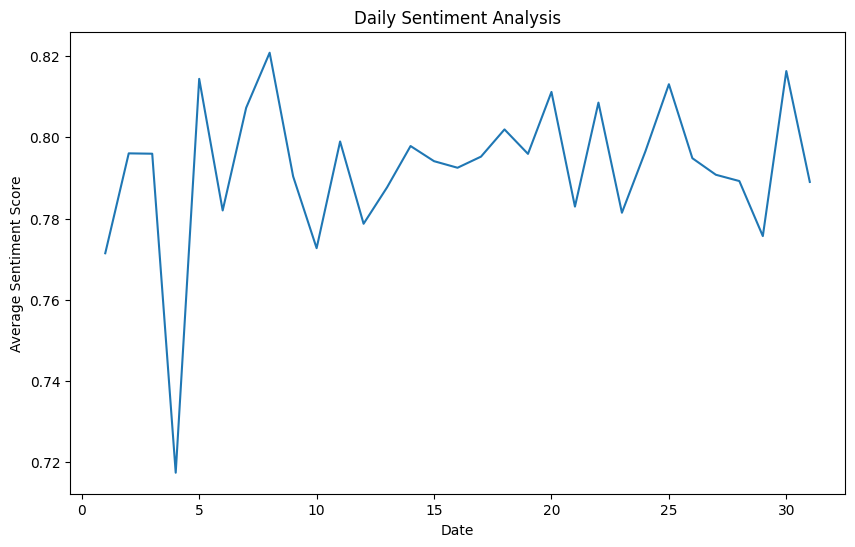

In [ ]:
# Group by day and calculate average sentiment score
daily_sentiment = df.groupby(df['Day'])['sentiment_score'].mean()

# Visualize daily sentiment scores
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Daily Sentiment Analysis')
plt.show()

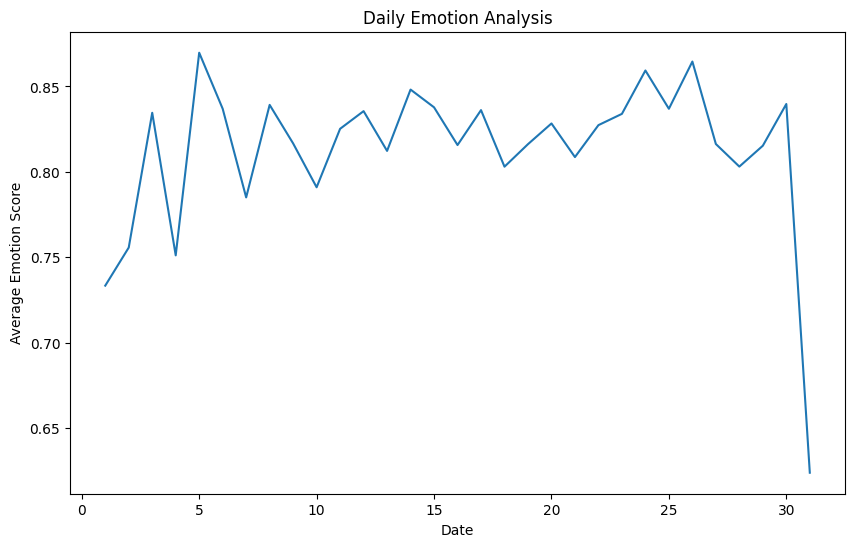

In [ ]:
daily_emotion = df.groupby(df['Day'])['emotion_score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(daily_emotion.index, daily_emotion.values)
plt.xlabel('Date')
plt.ylabel('Average Emotion Score')
plt.title('Daily Emotion Analysis')
plt.show()

In [ ]:
# Group by day and calculate average sentiment score
daily_sentiment = df.groupby(df['Day'])['sentiment_score'].mean().reset_index()

# Visualize daily sentiment scores
fig = px.line(daily_sentiment, x='Day', y='sentiment_score', title='Daily Sentiment Analysis')
fig.update_layout(xaxis_title='Date', yaxis_title='Average Sentiment Score')
fig.show()

In [ ]:
# Group by day and calculate average emotion score
daily_emotion = df.groupby(df['Day'])['emotion_score'].mean().reset_index()

# Visualize daily emotion scores
fig = px.line(daily_emotion, x='Day', y='emotion_score', title='Daily Emotion Analysis')
fig.update_layout(xaxis_title='Date', yaxis_title='Average Emotion Score')
fig.show()

In [ ]:
df1=df.copy()

In [ ]:
# Prepare the data
df1.set_index('Datetime', inplace=True)

# Calculate daily average sentiment score
daily_sentiment = df1['sentiment_score'].resample('D').mean()

# Plot daily sentiment analysis
fig = px.line(daily_sentiment, x=daily_sentiment.index, y=daily_sentiment.values)
fig.update_layout(
    title="Daily Sentiment Analysis",
    xaxis_title="Date",
    yaxis_title="Average Sentiment Score"
)
fig.show()

# Calculate daily average emotion score
daily_emotion = df1['emotion_score'].resample('D').mean()

# Plot daily emotion analysis
fig = px.line(daily_emotion, x=daily_emotion.index, y=daily_emotion.values)
fig.update_layout(
    title="Daily Emotion Analysis",
    xaxis_title="Date",
    yaxis_title="Average Emotion Score"
)
fig.show()

In [ ]:
df2=df.copy()

In [ ]:
# Prepare the data
df2.set_index('Datetime', inplace=True)

# Resample the data to get daily sentiment scores for each category
daily_sentiments = df2.groupby(['Day', 'sentiment'])['sentiment_score'].mean().unstack()

# Plot the comparative analysis
fig = go.Figure()

# Add traces for each sentiment category
for sentiment in ['positive', 'negative', 'neutral']:
    fig.add_trace(go.Scatter(
        x=daily_sentiments.index,
        y=daily_sentiments[sentiment],
        mode='lines',
        name=sentiment.capitalize()
    ))

fig.update_layout(
    title="Comparative Sentiment Analysis",
    xaxis_title="Date",
    yaxis_title="Average Sentiment Score",
    legend_title="Sentiment"
)
fig.show()

In [ ]:
df3=df.copy()

In [ ]:
# Prepare the data
df3.set_index('Datetime', inplace=True)

# Resample the data to get daily emotion scores for each category
daily_emotions = df3.groupby(['Day', 'emotion'])['emotion_score'].mean().unstack()

# Plot the comparative analysis
fig = go.Figure()

# Add traces for each emotion category
for emotion in ['anticipation', 'joy', 'anger', 'sadness', 'fear', 'optimism',
       'disgust', 'surprise']:
    fig.add_trace(go.Scatter(
        x=daily_emotions.index,
        y=daily_emotions[emotion],
        mode='lines',
        name=emotion.capitalize()
    ))

fig.update_layout(
    title="Comparative Emotion Analysis",
    xaxis_title="Date",
    yaxis_title="Average Emotion Score",
    legend_title="Emotion"
)
fig.show()

In [ ]:
df

Datetime  \
0    2022-09-30 23:29:15+00:00   
1    2022-09-30 21:46:35+00:00   
2    2022-09-30 21:18:02+00:00   
3    2022-09-30 20:05:24+00:00   
4    2022-09-30 20:03:17+00:00   
...                        ...   
3760 2022-08-17 14:00:00+00:00   
3761 2022-08-17 13:57:30+00:00   
3762 2022-08-17 13:33:17+00:00   
3763 2022-08-17 13:32:58+00:00   
3764 2022-08-17 13:32:37+00:00   

                                                   Text         Username  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   ManjuSreedaran   
1     @MK_habit_addict @official_stier @MortalKombat...       MiKeMcDnet   
2     As @CRN celebrates its 40th anniversary, Bob F...         jfollett   
3     @dell your customer service is horrible especi...        daveccarr   
4     @zacokalo @Dell @DellCares @Dell give the man ...       heycamella   
...                                                 ...              ...   
3760  Today is the day! Get your questions answered ...          wwt_inc   
3761  Re: the above\n\n@Dell @DellServices I have th...  keepingevenkeel   
3762  Want to share about my dell horror story.just ...      aviinfinity   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...        omocopalm   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...     AnkitaAnkkie   

     sentiment  sentiment_score       emotion  emotion_score  Day  Month  Year  
0      neutral         0.853283  anticipation       0.587121   30      9  2022  
1      neutral         0.519470           joy       0.886913   30      9  2022  
2     positive         0.763791           joy       0.960347   30      9  2022  
3     negative         0.954023         anger       0.983203   30      9  2022  
4      neutral         0.529170         anger       0.776124   30      9  2022  
...        ...              ...           ...            ...  ...    ...   ...  
3760  positive         0.657329  anticipation       0.837537   17      8  2022  
3761   neutral         0.689704  anticipation       0.506186   17      8  2022  
3762  negative         0.649829       disgust       0.775682   17      8  2022  
3763  negative         0.523149       disgust       0.851560   17      8  2022  
3764  positive         0.000000           NaN            NaN   17      8  2022  

[3765 rows x 10 columns]

In [ ]:
df4=df.copy()

In [ ]:
df4.columns

Index(['Datetime', 'Text', 'Username', 'sentiment', 'sentiment_score',
       'emotion', 'emotion_score', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
df4 = df[['Text', 'sentiment', 'sentiment_score',
       'emotion', 'emotion_score']]

In [ ]:
df4

Text sentiment  \
0     @Logitech @apple @Google @Microsoft @Dell @Len...   neutral   
1     @MK_habit_addict @official_stier @MortalKombat...   neutral   
2     As @CRN celebrates its 40th anniversary, Bob F...  positive   
3     @dell your customer service is horrible especi...  negative   
4     @zacokalo @Dell @DellCares @Dell give the man ...   neutral   
...                                                 ...       ...   
3760  Today is the day! Get your questions answered ...  positive   
3761  Re: the above\n\n@Dell @DellServices I have th...   neutral   
3762  Want to share about my dell horror story.just ...  negative   
3763  @AVM_DE @openSUSE Only the NIC in my @Dell mon...  negative   
3764  It’s Time to Fly with @Dell \nHost for today 🧿...  positive   

      sentiment_score       emotion  emotion_score  
0            0.853283  anticipation       0.587121  
1            0.519470           joy       0.886913  
2            0.763791           joy       0.960347  
3            0.954023         anger       0.983203  
4            0.529170         anger       0.776124  
...               ...           ...            ...  
3760         0.657329  anticipation       0.837537  
3761         0.689704  anticipation       0.506186  
3762         0.649829       disgust       0.775682  
3763         0.523149       disgust       0.851560  
3764         0.000000           NaN            NaN  

[3765 rows x 5 columns]

# Data Preprocessing / Data Cleaning

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df4.Text = df4.Text.apply(lambda x: clean_text(x))

In [ ]:
df4['Text']

0       @logitech @apple @google @microsoft @dell @len...
1       @mk_habit_addict @official_stier @mortalkombat...
2       as @crn celebrates its 40th anniversary, bob f...
3       @dell your customer service is horrible especi...
4       @zacokalo @dell @dellcares @dell give the man ...
                              ...                        
3760    today is the day! get your questions answered ...
3761    re: the above\n\n@dell @dellservices i have th...
3762    want to share about my dell horror story.just ...
3763    @avm_de @opensuse only the nic in my @dell mon...
3764    it’s time to fly with @dell \nhost for today 🧿...
Name: Text, Length: 3765, dtype: object

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df4.Text= df4['Text'].apply(lambda x:remove_punctuation(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialstier mortalkombat newze...
2       as crn celebrates its 40th anniversary bob fal...
3       dell your customer service is horrible especia...
4       zacokalo dell dellcares dell give the man what...
                              ...                        
3760    today is the day get your questions answered a...
3761    re the above\n\ndell dellservices i have the o...
3762    want to share about my dell horror storyjust r...
3763    avmde opensuse only the nic in my dell monitor...
3764    it’s time to fly with dell \nhost for today 🧿💙...
Name: Text, Length: 3765, dtype: object

In [ ]:
import re            ##regular expression for pattern in data
def tokenization(text):                 ##breaking down words into various text
    tokens = re.split('W+',text)
    return tokens

In [ ]:
df4['Text']= df4['Text'].apply(lambda x: tokenization(x))

In [ ]:
df4['Text']

0       [logitech apple google microsoft dell lenovo w...
1       [mkhabitaddict officialstier mortalkombat newz...
2       [as crn celebrates its 40th anniversary bob fa...
3       [dell your customer service is horrible especi...
4       [zacokalo dell dellcares dell give the man wha...
                              ...                        
3760    [today is the day get your questions answered ...
3761    [re the above\n\ndell dellservices i have the ...
3762    [want to share about my dell horror storyjust ...
3763    [avmde opensuse only the nic in my dell monito...
3764    [it’s time to fly with dell \nhost for today 🧿...
Name: Text, Length: 3765, dtype: object

In [ ]:
pip install nltk

In [ ]:
import nltk  ##natural language tool kit
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [ ]:
df4['Text']= df4['Text'].apply(lambda x:remove_stopwords(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialstier mortalkombat newze...
2       as crn celebrates its 40th anniversary bob fal...
3       dell your customer service is horrible especia...
4       zacokalo dell dellcares dell give the man what...
                              ...                        
3760    today is the day get your questions answered a...
3761    re the above\n\ndell dellservices i have the o...
3762    want to share about my dell horror storyjust r...
3763    avmde opensuse only the nic in my dell monitor...
3764    it’s time to fly with dell \nhost for today 🧿💙...
Name: Text, Length: 3765, dtype: object

use spacy for not removed word

In [ ]:
from nltk.stem import WordNetLemmatizer       ##stemming,lemitizing
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
played and playing are same words both have same meaning -> play lemmatizer convert to root word and stemming not sure it can be or it cant

In [ ]:
nltk.download('wordnet')    #database of english words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [ ]:
df4['Text']=df4['Text'].apply(lambda x:lemmatizer(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialstier mortalkombat newze...
2       as crn celebrates its 40th anniversary bob fal...
3       dell your customer service is horrible especia...
4       zacokalo dell dellcares dell give the man what...
                              ...                        
3760    today is the day get your questions answered a...
3761    re the above\n\ndell dellservices i have the o...
3762    want to share about my dell horror storyjust r...
3763    avmde opensuse only the nic in my dell monitor...
3764    it’s time to fly with dell \nhost for today 🧿💙...
Name: Text, Length: 3765, dtype: object

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [ ]:
df4['Text'] = df4.Text.apply(lambda x: clean_text(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialstier mortalkombat newze...
2       as crn celebrates its anniversary bob faletra ...
3       dell your customer service is horrible especia...
4       zacokalo dell dellcares dell give the man what...
                              ...                        
3760    today is the day get your questions answered a...
3761    re the above\n\ndell dellservices i have the o...
3762    want to share about my dell horror storyjust r...
3763    avmde opensuse only the nic in my dell monitor...
3764    it’s time to fly with dell \nhost for today 🧿💙...
Name: Text, Length: 3765, dtype: object

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
df4['Text'] =  df4.Text.apply(lambda x: lemmatizer(x))

In [ ]:
df4['Text']

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
df4['Text'] = df4.Text.apply(lambda x: remove_urls(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialsti mortalkombat newzeal...
2         crn   celebrate anniversary   bob faletra   ...
3       dell customer service horrible especially agen...
4                    zacokalo dell dellcares dell man pay
                              ...                        
3760    today day question answer dell primary storage...
3761    \n\n dell dellservice original xps pristine co...
3762    want share dell horror storyjust realize lapto...
3763    avmde opensuse nic dell monitor affect usb net...
3764    time fly dell \n host today 🧿 💙 🎤 \n\n\n\n abh...
Name: Text, Length: 3765, dtype: object

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df4['Text'] = df4.Text.apply(lambda x: remove_digits(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialsti mortalkombat newzeal...
2         crn   celebrate anniversary   bob faletra   ...
3       dell customer service horrible especially agen...
4                    zacokalo dell dellcares dell man pay
                              ...                        
3760    today day question answer dell primary storage...
3761    \n\n dell dellservice original xps pristine co...
3762    want share dell horror storyjust realize lapto...
3763    avmde opensuse nic dell monitor affect usb net...
3764    time fly dell \n host today 🧿 💙 🎤 \n\n\n\n abh...
Name: Text, Length: 3765, dtype: object

In [ ]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text)

In [ ]:
df4['Text'] = df4.Text.apply(lambda x: remove_digits1(x))

In [ ]:
df4['Text']

0       logitech apple google microsoft dell lenovo wh...
1       mkhabitaddict officialsti mortalkombat newzeal...
2       crn celebrate anniversary bob faletra stevenjb...
3       dell customer service horrible especially agen...
4                    zacokalo dell dellcares dell man pay
                              ...                        
3760    today day question answer dell primary storage...
3761    dell dellservice original xps pristine conditi...
3762    want share dell horror storyjust realize lapto...
3763    avmde opensuse nic dell monitor affect usb net...
3764    time fly dell host today 🧿 💙 🎤 abhi toh lambi ...
Name: Text, Length: 3765, dtype: object

In [ ]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
df4['Text'] = df4.Text.apply(lambda x: remove_emojis(x))

In [ ]:
df4

Text sentiment  \
0     logitech apple google microsoft dell lenovo wh...   neutral   
1     mkhabitaddict officialsti mortalkombat newzeal...   neutral   
2     crn celebrate anniversary bob faletra stevenjb...  positive   
3     dell customer service horrible especially agen...  negative   
4                  zacokalo dell dellcares dell man pay   neutral   
...                                                 ...       ...   
3760  today day question answer dell primary storage...  positive   
3761  dell dellservice original xps pristine conditi...   neutral   
3762  want share dell horror storyjust realize lapto...  negative   
3763  avmde opensuse nic dell monitor affect usb net...  negative   
3764  time fly dell host today 🧿   abhi toh lambi ch...  positive   

      sentiment_score       emotion  emotion_score  
0            0.853283  anticipation       0.587121  
1            0.519470           joy       0.886913  
2            0.763791           joy       0.960347  
3            0.954023         anger       0.983203  
4            0.529170         anger       0.776124  
...               ...           ...            ...  
3760         0.657329  anticipation       0.837537  
3761         0.689704  anticipation       0.506186  
3762         0.649829       disgust       0.775682  
3763         0.523149       disgust       0.851560  
3764         0.000000           NaN            NaN  

[3765 rows x 5 columns]

In [ ]:
df4['Text_Length'] = df4['Text'].apply(lambda x: len(x))

In [ ]:
df4

Text sentiment  \
0     logitech apple google microsoft dell lenovo wh...   neutral   
1     mkhabitaddict officialsti mortalkombat newzeal...   neutral   
2     crn celebrate anniversary bob faletra stevenjb...  positive   
3     dell customer service horrible especially agen...  negative   
4                  zacokalo dell dellcares dell man pay   neutral   
...                                                 ...       ...   
3760  today day question answer dell primary storage...  positive   
3761  dell dellservice original xps pristine conditi...   neutral   
3762  want share dell horror storyjust realize lapto...  negative   
3763  avmde opensuse nic dell monitor affect usb net...  negative   
3764  time fly dell host today 🧿   abhi toh lambi ch...  positive   

      sentiment_score       emotion  emotion_score  Text_Length  
0            0.853283  anticipation       0.587121          211  
1            0.519470           joy       0.886913          106  
2            0.763791           joy       0.960347          171  
3            0.954023         anger       0.983203          143  
4            0.529170         anger       0.776124           36  
...               ...           ...            ...          ...  
3760         0.657329  anticipation       0.837537           58  
3761         0.689704  anticipation       0.506186          112  
3762         0.649829       disgust       0.775682          190  
3763         0.523149       disgust       0.851560           93  
3764         0.000000           NaN            NaN          187  

[3765 rows x 6 columns]

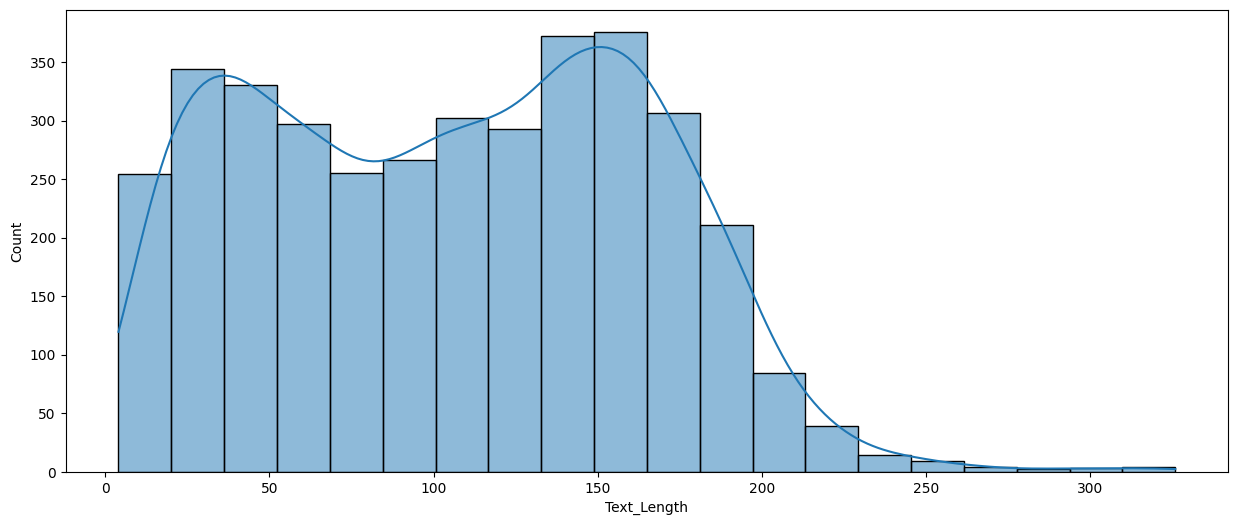

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df4['Text_Length'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

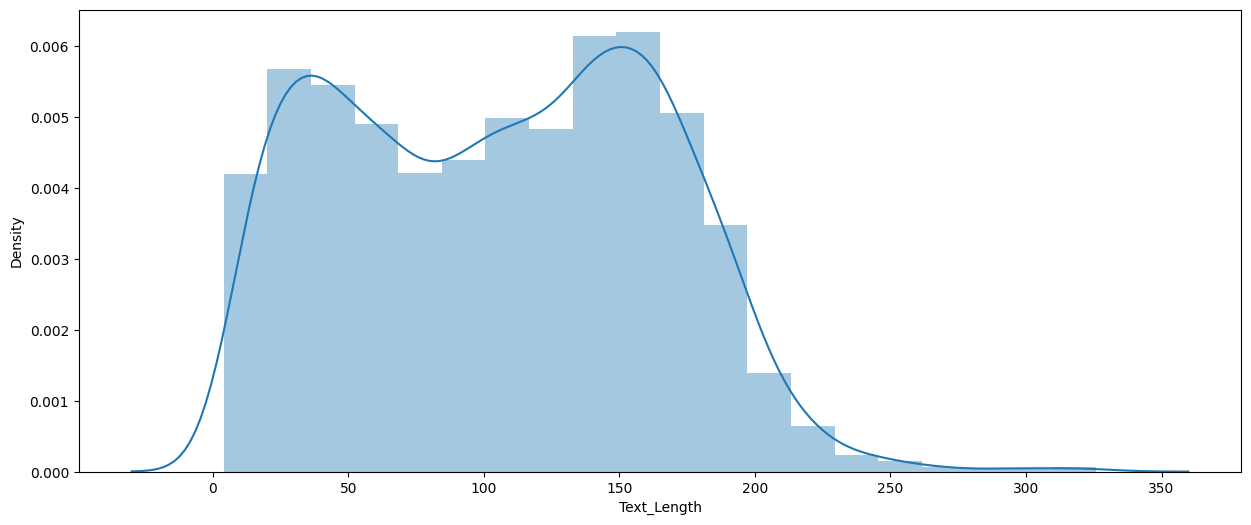

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df4['Text_Length'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

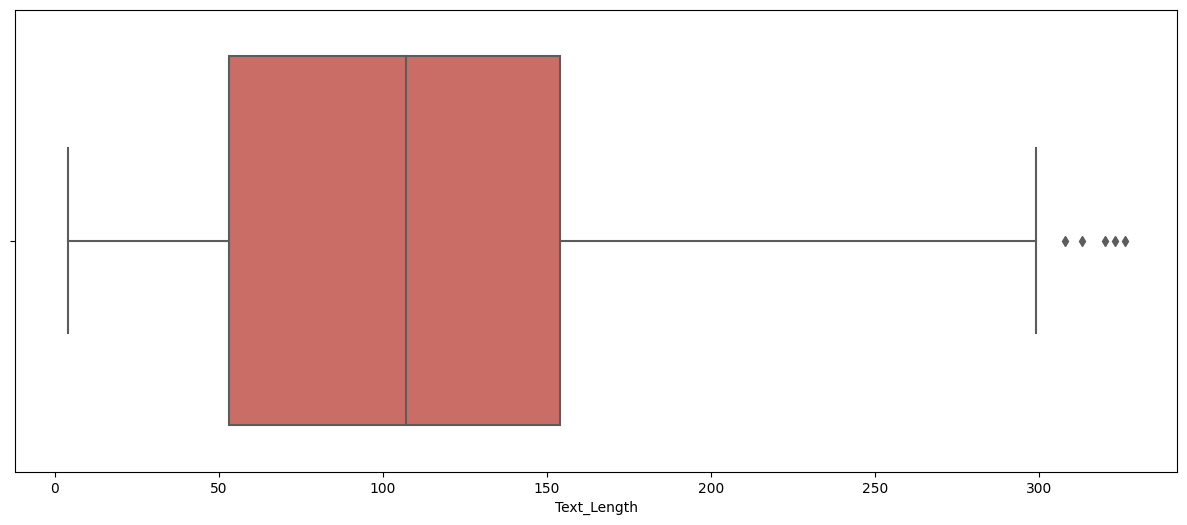

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Text_Length', data = df4, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

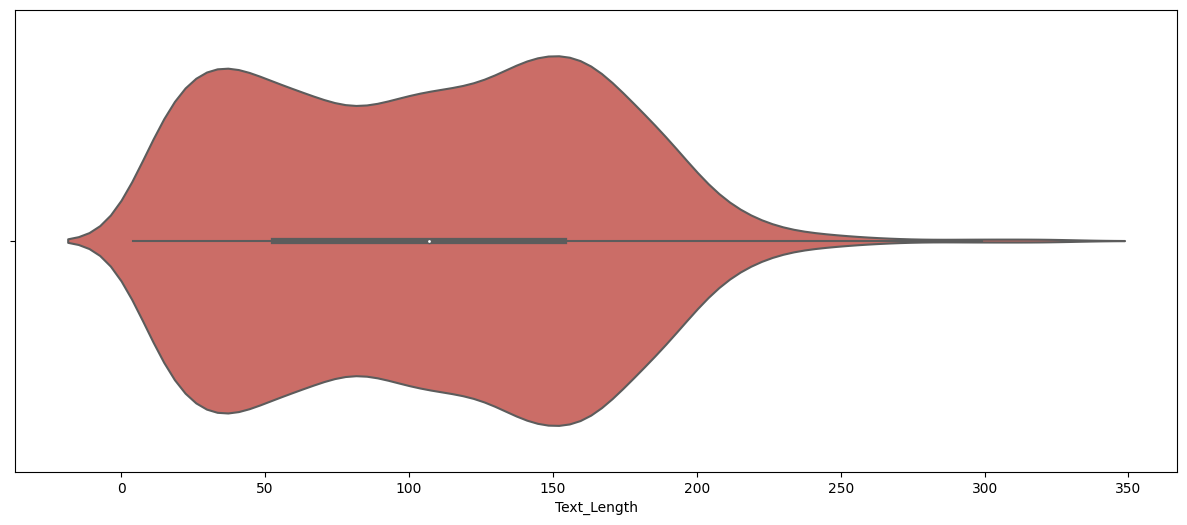

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Text_Length', data = df4, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
import wordcloud

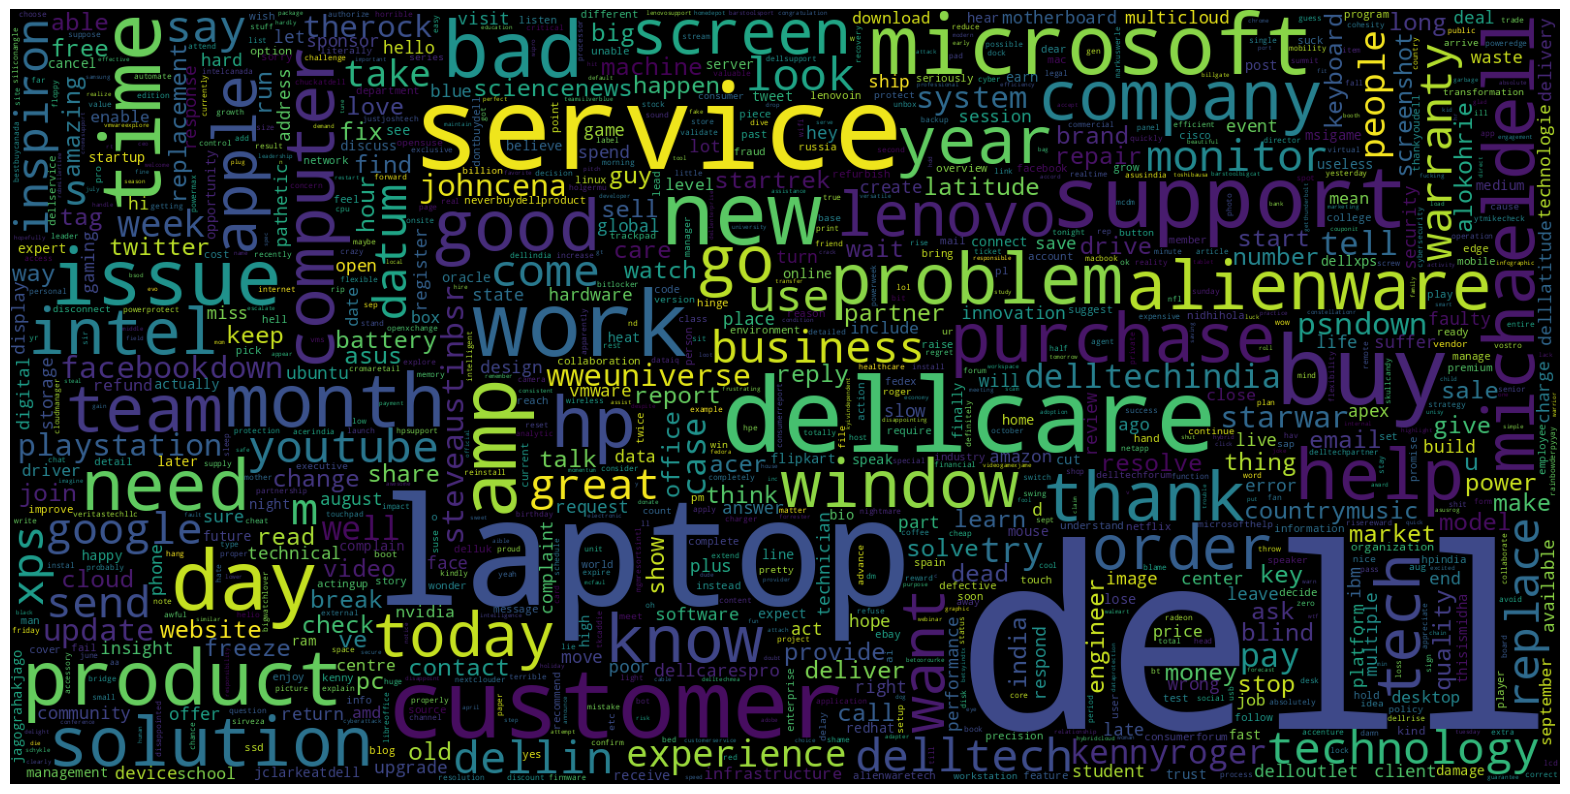

In [ ]:
from wordcloud import WordCloud
data = df4['Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

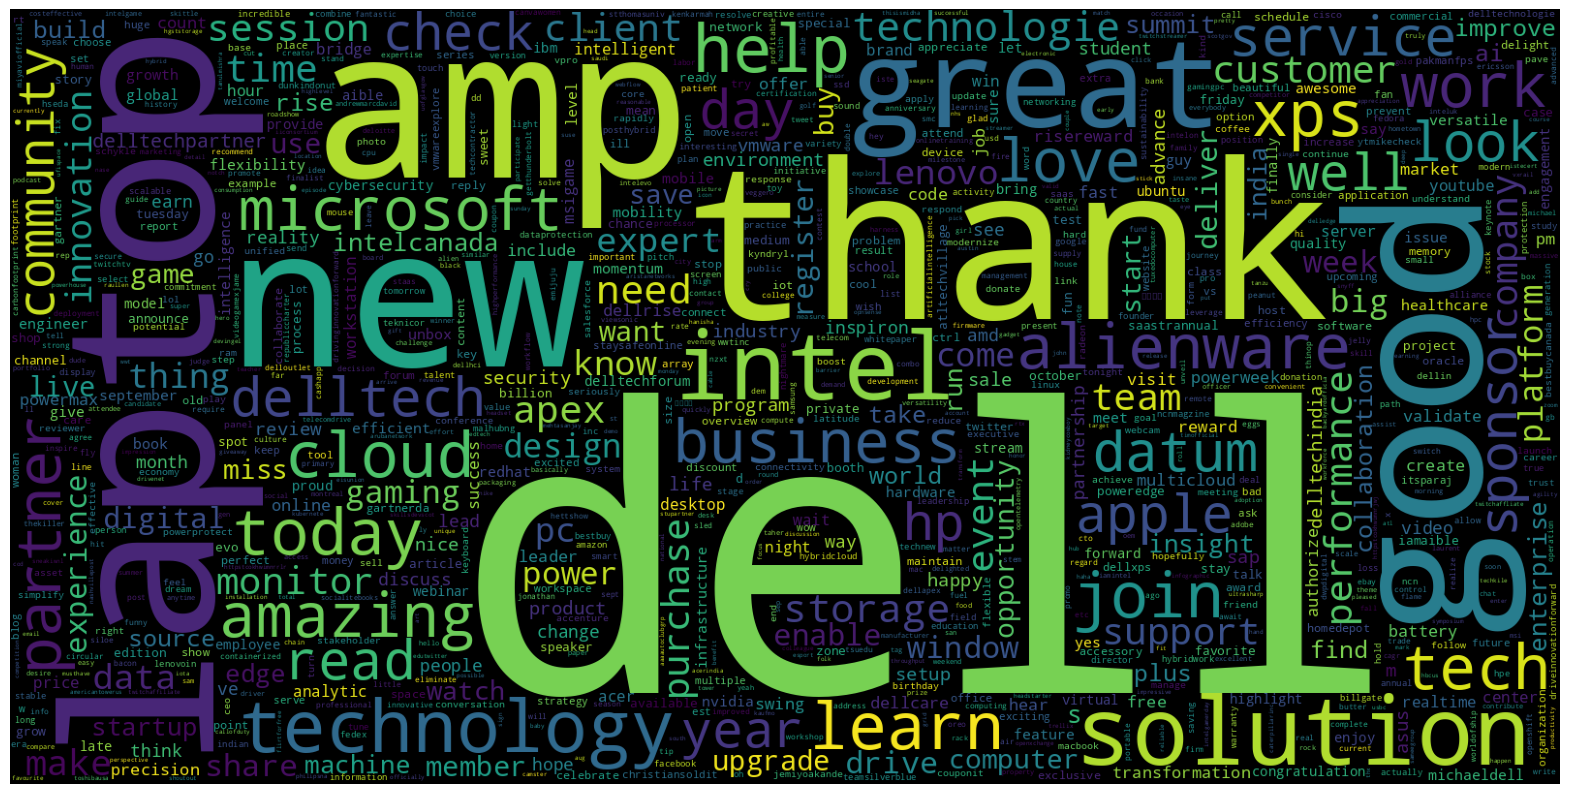

In [ ]:
data = df4[df4['sentiment']=="positive"]['Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

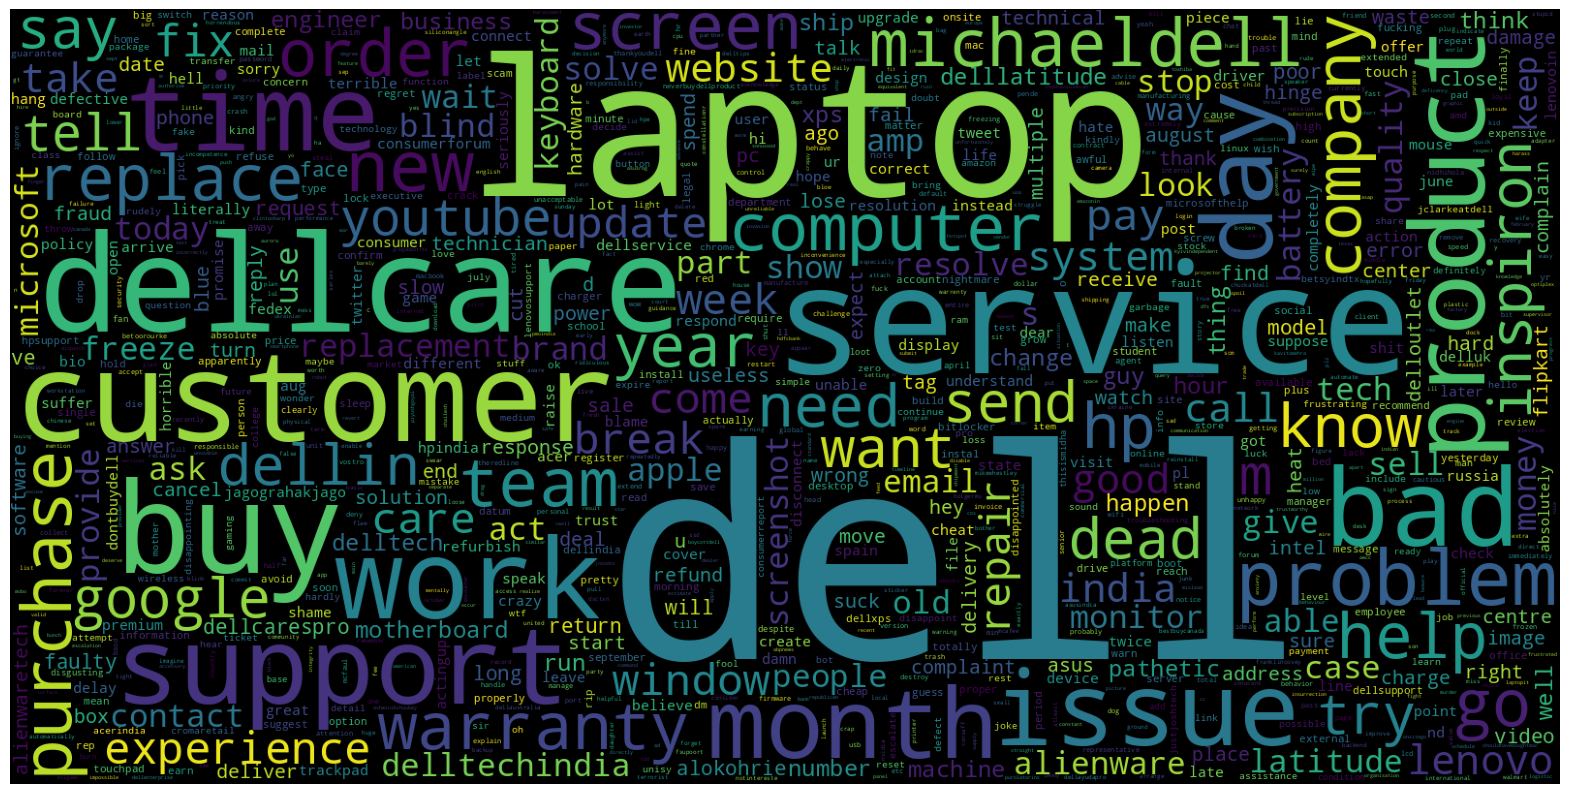

In [ ]:
data = df4[df4['sentiment']=="negative"]['Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

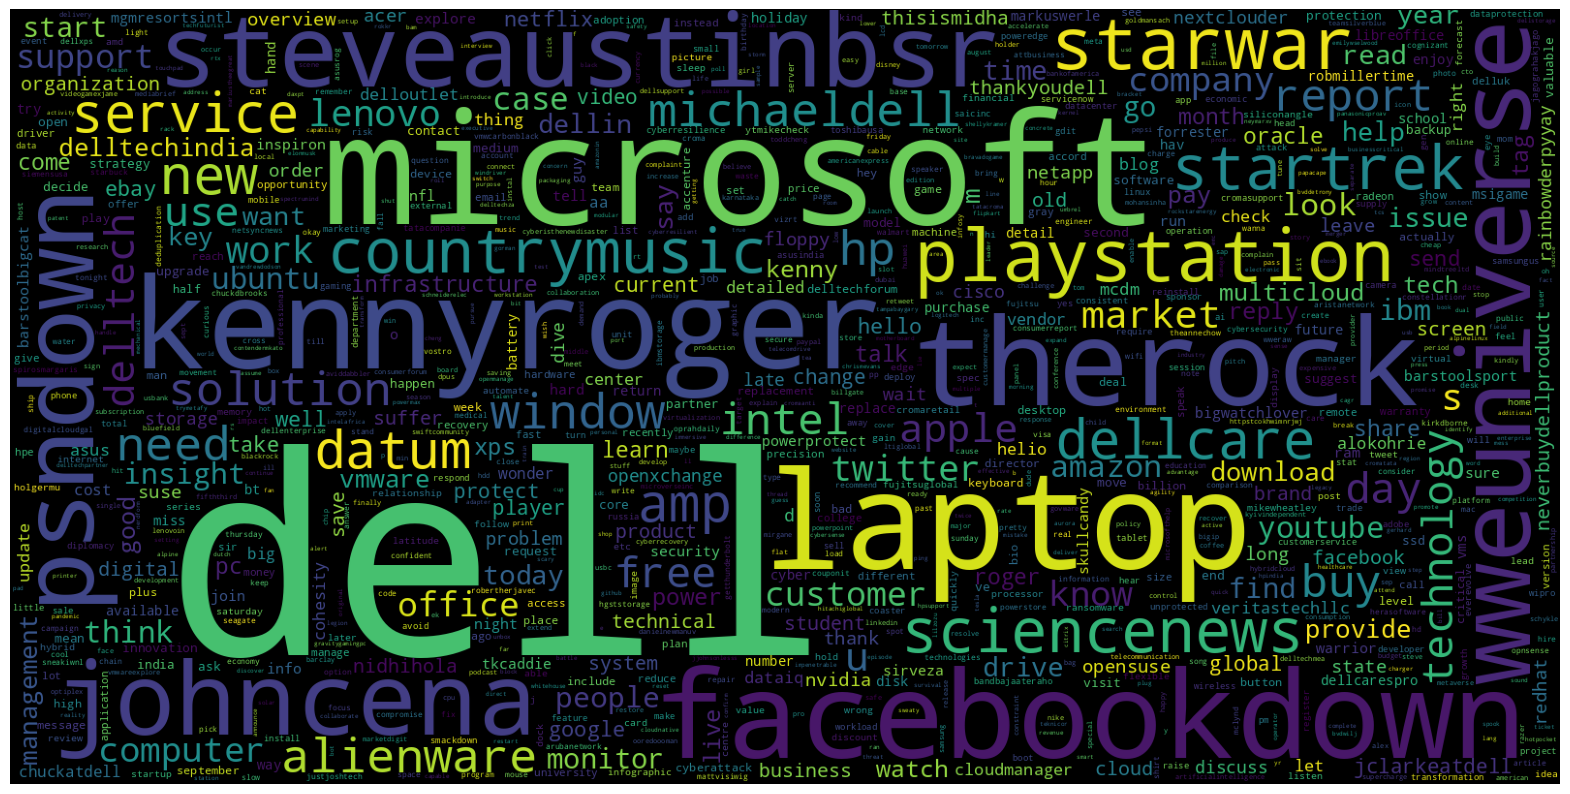

In [ ]:
data = df4[df4['sentiment']=="neutral"]['Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
df5 = df4[['Text','sentiment']]

In [ ]:
df5

Text sentiment
0     logitech apple google microsoft dell lenovo wh...   neutral
1     mkhabitaddict officialsti mortalkombat newzeal...   neutral
2     crn celebrate anniversary bob faletra stevenjb...  positive
3     dell customer service horrible especially agen...  negative
4                  zacokalo dell dellcares dell man pay   neutral
...                                                 ...       ...
3760  today day question answer dell primary storage...  positive
3761  dell dellservice original xps pristine conditi...   neutral
3762  want share dell horror storyjust realize lapto...  negative
3763  avmde opensuse nic dell monitor affect usb net...  negative
3764  time fly dell host today 🧿   abhi toh lambi ch...  positive

[3765 rows x 2 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df['Text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", cr)

Accuracy: 0.6879150066401063
Classification Report:
               precision    recall  f1-score   support

    negative       0.63      0.99      0.77       340
     neutral       0.82      0.30      0.44       207
    positive       0.84      0.58      0.69       206

    accuracy                           0.69       753
   macro avg       0.76      0.62      0.63       753
weighted avg       0.74      0.69      0.66       753



In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.7609561752988048

In [ ]:
cr = classification_report(y_test, y_pred)

In [ ]:
print(cr)

              precision    recall  f1-score   support

    negative       0.80      0.92      0.85       340
     neutral       0.72      0.49      0.58       207
    positive       0.72      0.77      0.75       206

    accuracy                           0.76       753
   macro avg       0.75      0.73      0.73       753
weighted avg       0.76      0.76      0.75       753



In [ ]:
df6 = df4[['Text','sentiment']]

In [ ]:
df6

Text sentiment
0     logitech apple google microsoft dell lenovo wh...   neutral
1     mkhabitaddict officialsti mortalkombat newzeal...   neutral
2     crn celebrate anniversary bob faletra stevenjb...  positive
3     dell customer service horrible especially agen...  negative
4                  zacokalo dell dellcares dell man pay   neutral
...                                                 ...       ...
3760  today day question answer dell primary storage...  positive
3761  dell dellservice original xps pristine conditi...   neutral
3762  want share dell horror storyjust realize lapto...  negative
3763  avmde opensuse nic dell monitor affect usb net...  negative
3764  time fly dell host today 🧿   abhi toh lambi ch...  positive

[3765 rows x 2 columns]

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df6['sentiment'])

In [ ]:
X = df6['Text']
y = y_encoded

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer1 = TfidfVectorizer()
X_train_vectorized = vectorizer1.fit_transform(X_train)
X_test_vectorized = vectorizer1.transform(X_test)

In [ ]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train_vectorized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xg_model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.7304116865869854
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       340
           1       0.57      0.62      0.60       207
           2       0.74      0.68      0.71       206

    accuracy                           0.73       753
   macro avg       0.71      0.71      0.71       753
weighted avg       0.73      0.73      0.73       753



In [ ]:
import pickle

with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)